In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
tracksinfo_df = pd.read_excel(r"tracks.xlsx")

In [4]:
tracksinfo_df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Mine
0,0.809,0.911,6,-4.410,0,0.0617,0.00795,0.000179,0.181,0.640,122.035,audio_features,6tCssnvTUREcperDOUTqvA,spotify:track:6tCssnvTUREcperDOUTqvA,https://api.spotify.com/v1/tracks/6tCssnvTUREc...,https://api.spotify.com/v1/audio-analysis/6tCs...,191242,4,True
1,0.779,0.342,3,-6.316,0,0.0404,0.70100,0.000003,0.132,0.482,104.993,audio_features,4poybupy26pTWPr9zY1i7h,spotify:track:4poybupy26pTWPr9zY1i7h,https://api.spotify.com/v1/tracks/4poybupy26pT...,https://api.spotify.com/v1/audio-analysis/4poy...,175602,4,True
2,0.591,0.719,8,-6.738,1,0.0461,0.02220,0.004500,0.228,0.189,132.997,audio_features,1K1Silv1En6oJ8mr7Hj0nc,spotify:track:1K1Silv1En6oJ8mr7Hj0nc,https://api.spotify.com/v1/tracks/1K1Silv1En6o...,https://api.spotify.com/v1/audio-analysis/1K1S...,218280,4,True
3,0.822,0.969,7,-11.471,0,0.0582,0.25900,0.000153,0.390,0.765,128.007,audio_features,5QRAfvKPyQpwt897Jc0glg,spotify:track:5QRAfvKPyQpwt897Jc0glg,https://api.spotify.com/v1/tracks/5QRAfvKPyQpw...,https://api.spotify.com/v1/audio-analysis/5QRA...,283748,4,True
4,0.727,0.939,8,-11.855,1,0.0369,0.13500,0.000044,0.151,0.916,113.330,audio_features,7GhIk7Il098yCjg4BQjzvb,spotify:track:7GhIk7Il098yCjg4BQjzvb,https://api.spotify.com/v1/tracks/7GhIk7Il098y...,https://api.spotify.com/v1/audio-analysis/7GhI...,212827,4,True


In [5]:
tracksinfo_df.shape

(9637, 19)

In [6]:
track_id = tracksinfo_df[["id", "uri", "track_href", "analysis_url", "type"]]

In [7]:
tracksinfo_df.drop(["id", "uri", "track_href", "analysis_url", "type"], axis = 1, inplace = True)

In [8]:
tracksinfo_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Mine
0,0.809,0.911,6,-4.410,0,0.0617,0.00795,0.000179,0.1810,0.640,122.035,191242,4,True
1,0.779,0.342,3,-6.316,0,0.0404,0.70100,0.000003,0.1320,0.482,104.993,175602,4,True
2,0.591,0.719,8,-6.738,1,0.0461,0.02220,0.004500,0.2280,0.189,132.997,218280,4,True
3,0.822,0.969,7,-11.471,0,0.0582,0.25900,0.000153,0.3900,0.765,128.007,283748,4,True
4,0.727,0.939,8,-11.855,1,0.0369,0.13500,0.000044,0.1510,0.916,113.330,212827,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,0.906,0.585,8,-7.720,0,0.3240,0.05770,0.000000,0.1280,0.831,129.055,292339,4,False
9633,0.000,0.387,7,-8.395,0,0.0000,0.56400,0.000000,0.1600,0.000,0.000,11837,0,False
9634,0.771,0.344,2,-9.274,1,0.9140,0.68300,0.000000,0.1290,0.713,98.133,68308,3,False
9635,0.358,0.294,7,-15.400,1,0.0452,0.74100,0.001510,0.0928,0.102,92.081,209947,4,False


In [9]:
tracksinfo_df["Mine"].value_counts()

False    5977
True     3660
Name: Mine, dtype: int64

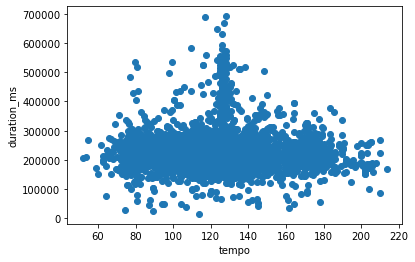

In [10]:
plt.scatter(x = tracksinfo_df[tracksinfo_df["Mine"]== True]["tempo"], y = tracksinfo_df[tracksinfo_df["Mine"]== True]["duration_ms"])
plt.xlabel('tempo')
plt.ylabel('duration_ms')
plt.show()

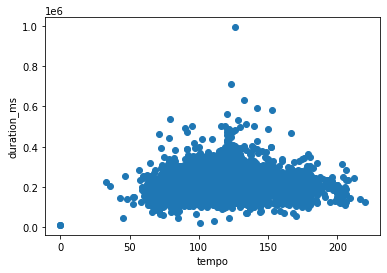

In [11]:
plt.scatter(x = tracksinfo_df[tracksinfo_df["Mine"]== False]["tempo"], y = tracksinfo_df[tracksinfo_df["Mine"]== False]["duration_ms"])
plt.xlabel('tempo')
plt.ylabel('duration_ms')
plt.show()

In [12]:
all_data_na = (tracksinfo_df.isnull().sum() / len(tracksinfo_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


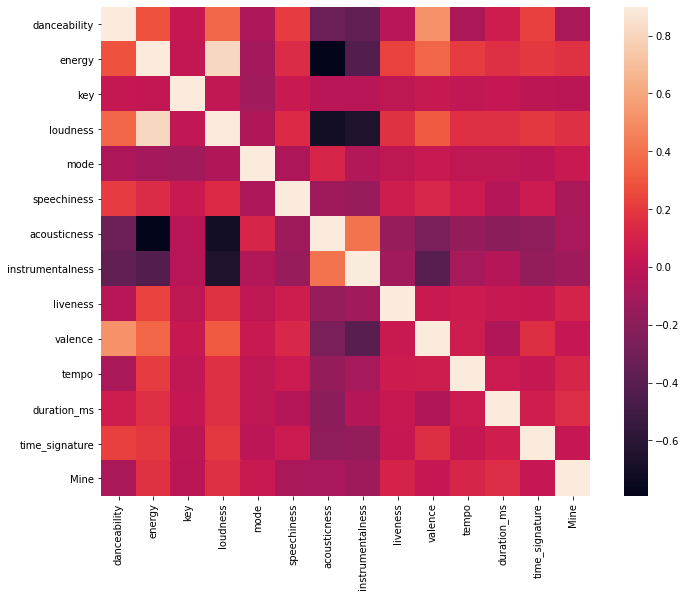

In [13]:
corrmat = tracksinfo_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
numeric_feats = tracksinfo_df.dtypes[tracksinfo_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tracksinfo_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
speechiness,3.144513
liveness,2.415837
duration_ms,2.061507
instrumentalness,1.881322
acousticness,1.203630
Mine,0.495386
tempo,0.315827
valence,0.096607
key,0.006169
danceability,-0.462940


In [15]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



In [16]:
tracksinfo_df = tracksinfo_df.sample(frac=1).reset_index(drop=True)

In [17]:
tracksinfo_df.shape

(9637, 14)

In [18]:
train = tracksinfo_df[:round(9637*0.8)]
test = tracksinfo_df[round(9637*0.8):]
y_train = train["Mine"].values
y_test = test["Mine"].values

In [19]:
train.shape

(7710, 14)

In [20]:
test.shape

(1927, 14)

In [21]:
7710+1927

9637

In [55]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [23]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [24]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [26]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0147 (0.0011)



In [56]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[21:51:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:51:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [28]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [41]:
X_train = train.drop("Mine", axis=1)
Y_train = train["Mine"]
X_test = test.drop("Mine", axis = 1)
Y_test = test["Mine"]


Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

XGBOOST

In [43]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
# dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [46]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:squarederror'}
model = xgb.train(xgb_pars, dtrain, 15, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[21:45:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.45461	valid-rmse:0.46488
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:0.43461	valid-rmse:0.45269
[2]	train-rmse:0.41911	valid-rmse:0.44821
[3]	train-rmse:0.40980	valid-rmse:0.45041
[4]	train-rmse:0.40385	valid-rmse:0.45234
Stopping. Best iteration:
[2]	train-rmse:0.41911	valid-rmse:0.44821

Modeling RMSLE 0.44821


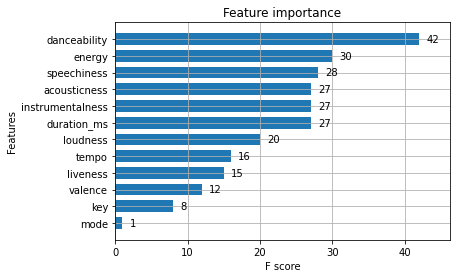

In [47]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

In [52]:
pred = model.predict(dvalid)
# pred = np.exp(pred) - 1
# pred
predictions = [round(value) for value in pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

array([0.34274364, 0.11434507, 0.68942654, ..., 0.47472405, 0.2910391 ,
       0.845163  ], dtype=float32)

Old algorithms

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

print(round(logreg.score(X_test, Y_test) * 100, 2))

62.4
60.51


In [31]:
svc = SVC()
svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

print(round(svc.score(X_test, Y_test) * 100, 2))

63.22
62.01


In [32]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

print(round(knn.score(X_test, Y_test) * 100, 2))

77.67
56.05


In [33]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)

print(round(gaussian.score(X_test, Y_test) * 100, 2))

62.08
61.08


In [34]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(acc_perceptron)

print(round(perceptron.score(X_test, Y_test) * 100, 2))

37.6
39.49


In [35]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

print(round(linear_svc.score(X_test, Y_test) * 100, 2))

37.6
39.49


c:\users\axel rooth\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(acc_sgd)

print(round(sgd.score(X_test, Y_test) * 100, 2))

37.6
39.49


In [37]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

print(round(decision_tree.score(X_test, Y_test) * 100, 2))

99.61
64.56


In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

Y_pred = random_forest.predict(X_test)
print(round(random_forest.score(X_test, Y_test) * 100, 2))

99.61
70.94
